# **Brain Tumor Model Creation**

## **Libraries Used**

In [68]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
import cv2

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

## **Train Data**

Train data:

In [69]:
train_data_path = 'test'

Train data classes:

In [70]:
tumor_classes = os.listdir(train_data_path)
train_csv = tumor_classes.pop()
tumor_classes

['glioma', 'meningioma', 'no_tumor', 'pituitary']

Image counts: 

In [71]:
tumor_class = {}
for i in tumor_classes:
    tumor_class[i] = os.path.join(train_data_path,i)
    if os.path.isdir(tumor_class[i]):
        count = len(os.listdir(tumor_class[i]))
        print(f"{i}: {count}")

glioma: 80
meningioma: 63
no_tumor: 49
pituitary: 54


Display image:

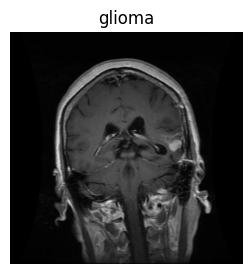

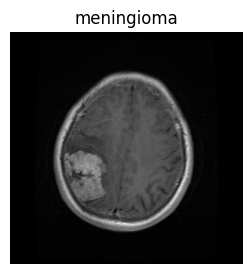

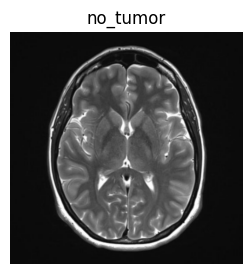

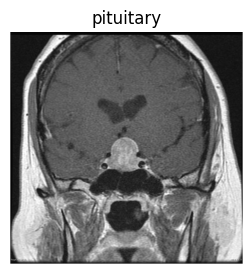

In [72]:
sample_images = {}
for i in tumor_class:
    plt.figure(figsize=(3,5))
    # Image Path
    image_name = os.listdir(tumor_class[i])[0]
    image_path = os.path.join(tumor_class[i],image_name)
    sample_images[i] = image_path
    # Image Display
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(i)
    plt.axis('off')
    plt.show()

Image shapes:

In [73]:
for i in sample_images:
    image = Image.open(sample_images[i])
    print(f"{i}: {image.size}")

glioma: (640, 640)
meningioma: (640, 640)
no_tumor: (640, 640)
pituitary: (640, 640)


## **Train Data Extraction**

Train data path & classes:

In [74]:
train_data_path, tumor_classes

('test', ['glioma', 'meningioma', 'no_tumor', 'pituitary'])

CSV values extraction: 

In [75]:
train_df_dict = []
for i in tumor_classes:
    image_path = os.path.join(train_data_path,i)
    for j in os.listdir(image_path):
        if j.endswith(('.jpg','.png','jpeg')):
            train_df_dict.append({'image_path':j,'labels':i})

train_df_dict[:5]

[{'image_path': 'Tr-gl_0016_jpg.rf.99746694ea97fe0b73108832b462d48e.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a636bc.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0028_jpg.rf.8098b9737048aac0dccb1b7c45046894.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad3c08.jpg',
  'labels': 'glioma'},
 {'image_path': 'Tr-gl_0035_jpg.rf.7a7c96ab2e6245cf42a0c86b97f81b3e.jpg',
  'labels': 'glioma'}]

CSV creation: 

In [76]:
train_df = pd.DataFrame(train_df_dict)
train_df.sample(5)

,image_path,labels
213,Tr-pi_0288_jpg.rf.93bc1605cd5f22831e1f8e2b7e3c...,pituitary
43,Tr-gl_0278_jpg.rf.2d2e5b394b899b5ee8e82a5d1487...,glioma
225,Tr-pi_0422_jpg.rf.d2ab544f99ae8e77800c3ec6f3d9...,pituitary
142,Tr-me_0543_jpg.rf.c59a09c22534c2c029bd030a7c1b...,meningioma
156,Tr-no_0165_jpg.rf.58e2b30d093b808eb95fd265ff98...,no_tumor


CSV save:

In [77]:
train_df.to_csv('tumor_train_data.csv',index=False)

One hot encoding:

In [78]:
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(train_df[['labels']])
encoded_df = pd.DataFrame(encoded,columns=ohe.get_feature_names_out(['labels']))

New DataFrame:

In [79]:
train_df_encoded = train_df.drop(columns=['labels'])
train_df_encoded = train_df_encoded.join(encoded_df)
train_df_encoded

,image_path,labels_glioma,labels_meningioma,labels_no_tumor,labels_pituitary
0,Tr-gl_0016_jpg.rf.99746694ea97fe0b73108832b462...,1.0,0.0,0.0,0.0
1,Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a6...,1.0,0.0,0.0,0.0
2,Tr-gl_0028_jpg.rf.8098b9737048aac0dccb1b7c4504...,1.0,0.0,0.0,0.0
3,Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad...,1.0,0.0,0.0,0.0
4,Tr-gl_0035_jpg.rf.7a7c96ab2e6245cf42a0c86b97f8...,1.0,0.0,0.0,0.0
...,...,...,...,...,...
241,Tr-pi_0603_jpg.rf.9e70cdd6216523136af186586679...,0.0,0.0,0.0,1.0
242,Tr-pi_0614_jpg.rf.38a5afc04dbd629b16f0bbd855bc...,0.0,0.0,0.0,1.0
243,Tr-pi_0636_jpg.rf.609ee034c63ba7e5b9f443de105b...,0.0,0.0,0.0,1.0
244,Tr-pi_0646_jpg.rf.d3e36be566da199204d83608fc89...,0.0,0.0,0.0,1.0


CSV encoded save:

In [80]:
train_df_encoded.to_csv('tumor_train_data_encoded.csv',index=False)

## **Resize and Normalize**

Train class:

In [81]:
tumor_class

{'glioma': 'test\\glioma',
 'meningioma': 'test\\meningioma',
 'no_tumor': 'test\\no_tumor',
 'pituitary': 'test\\pituitary'}

Resized image:

In [91]:
def resized_data(data_path):
    resized_images = []
    image_labels = []
    tumor_class = os.listdir(data_path)
    for i in tumor_class:
        class_path = os.path.join(data_path,i)
        if os.path.isdir(class_path):
            for j in os.listdir(class_path):
                image_path = os.path.join(class_path,j)
                image = cv2.imread(image_path)
                image = cv2.resize(image,(224,224))
                image = image.astype(float)/225
                resized_images.append(image)
                image_labels.append(i)
    return np.array(resized_images), np.array(image_labels)

## **Data Splitting**

Train data: 

In [93]:
x_train,y_train = resized_data(train_data_path)

Test data:

In [94]:
test_data_path = 'test'
x_train,y_train = resized_data(test_data_path)